In [33]:
from glob import glob
import pickle as pk
import numpy as np
import dfibers.fixed_points as fx
from ising_finder import get_loss_factory
import torch as tr

initial_starting_points = []
image_vectors:np.ndarray = np.empty((12,0))

image_vectors:np.ndarray

file_list = ["results/krammerswanier_plateau_params.pkl"]
file_list.extend(glob("results/krammerswanier_random_seed*.pkl"))

print(file_list)
for file in file_list:
    with open(file, "rb") as f:
        (c_targ, V, A, R) = pk.load(f)

        # Add initial starting point
        initial_starting_points.append(c_targ)
        get_loss = get_loss_factory(c_targ)

        # Filter duplicate points and high-loss points
        duplicates = lambda U, v: (np.fabs(U - v) < 0.1).all(axis=0)
        R_init:np.ndarray = R.copy()
        R = fx.get_unique_points(R, duplicates)

        loss = get_loss(tr.tensor(R.T))
        keep = loss.numpy() < 1e-8

        # Trim arrays
        R = R[:, keep]

        # Store resulting trimmed results
        image_vectors = np.concatenate(
            (image_vectors, R.reshape(12,R.shape[1])), axis=1
        )

# Convert to numpy arrays
initial_starting_points = np.array(initial_starting_points)
image_vectors = np.array(image_vectors)


['results/krammerswanier_plateau_params.pkl', 'results/krammerswanier_random_seed7.pkl', 'results/krammerswanier_random_seed1.pkl', 'results/krammerswanier_random_seed6.pkl', 'results/krammerswanier_random_seed4.pkl', 'results/krammerswanier_random_seed5.pkl', 'results/krammerswanier_random_seed3.pkl', 'results/krammerswanier_random_seed2.pkl']


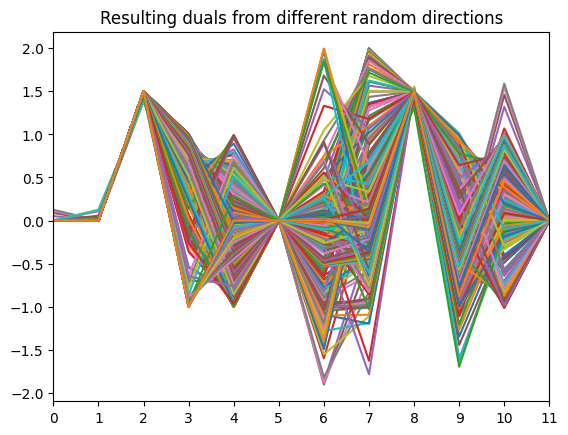

In [34]:
import matplotlib.pyplot as plt

plt.plot(image_vectors)
plt.xlim(0,11)
plt.xticks(range(12))
plt.title("Resulting duals from different random directions")

plt.show()

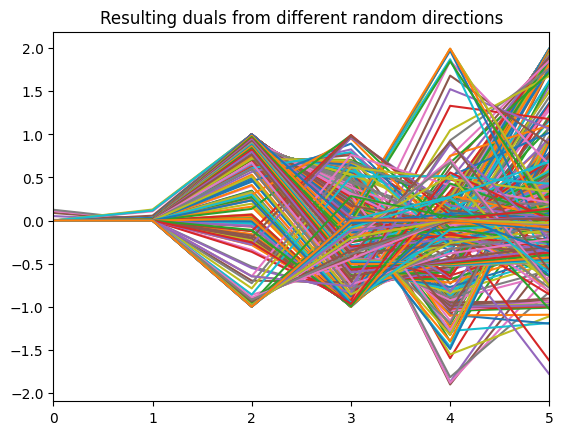

In [35]:
filtered_image_vectors = image_vectors[[0,1,3,4,6,7,9,10],:]
"""
Remove the constant values to determine what is truly changing in the data.
Removed: \sigma_z \sigma_z, \sigma_z^i, \sigma_z^0, \sigma_z^n
"""
plt.plot(filtered_image_vectors)
plt.xlim(0,5)
plt.xticks(range(6))
plt.title("Resulting duals from different random directions")

plt.show()